In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Jacobi_2D(sol,B,tol):
    Niter,Nx,Ny=sol.shape
    i_ter=1
    L2_norm=1
    while(L2_norm>tol and i_ter<Niter):
        for i in range(1,Nx-1,1):
            for j in range(1,Ny-1,1):
                sol[i_ter,i,j]= 0.25*(-B[i,j]+sol[i_ter-1,i+1,j]+sol[i_ter-1,i-1,j]+sol[i_ter-1,i,j+1]+sol[i_ter-1,i,j-1])
        L2_norm=L2_norm_func(sol,i_ter)
        i_ter=i_ter+1
    print(i_ter-1,L2_norm)
    return sol,i_ter-1

In [3]:
def Gauss_Seidal_2D(sol,B):
    Niter,Nx,Ny=sol.shape
    for i_ter in range(1,Niter,1):
        for i in range(1,Nx-1,1):
            for j in range(1,Ny-1,1):
                sol[i_ter,i,j]=0.25*(-B[i,j]+sol[i_ter-1,i+1,j]+sol[i_ter,i-1,j]+sol[i_ter-1,i,j+1]+sol[i_ter,i,j-1]) #we already have i-1 & j-1
    return sol

In [4]:
def SOR_2D(sol,B,omega):
    Niter,Nx,Ny=sol.shape
    for i_ter in range(1,Niter,1):
        for i in range(1,Nx-1,1):
            for j in range(1,Ny-1,1):
                sol[i_ter,i,j]=omega*(0.25*(-B[i,j]+sol[i_ter-1,i+1,j]+sol[i_ter,i-1,j]+sol[i_ter-1,i,j+1]+sol[i_ter,i,j-1]))+(1-omega)*sol[i_ter-1,i,j]
    return sol

In [5]:
def Red_Black_Gauss_Seidal_2D(sol):
    Niter,Nx,Ny=sol.shape
    for i_ter in range(1,Niter,1):
        for i in range(1,Nx-1,1):
            for j in range(1,Ny-1,1):
                if (i+j)%2==0:
                    sol[i_ter,i,j]=0.25*(-B[i,j]+sol[i_ter-1,i+1,j]+sol[i_ter-1,i-1,j]+sol[i_ter-1,i,j+1]+sol[i_ter-1,i,j-1]) 
                
        for i in range(1,Nx-1,1):
            for j in range(1,Ny-1,1):
                if (i+j)%2!=0:
                    sol[i_ter,i,j]=0.25*(-B[i,j]+sol[i_ter,i+1,j]+sol[i_ter,i-1,j]+sol[i_ter,i,j+1]+sol[i_ter,i,j-1])
    return sol

In [6]:
def L2_norm_func(sol,i_ter):
    summation = 0
    for i in range(0,Nx,1):
        for j in range(0,Ny,1):
            summation = summation + (sol[i_ter,i,j]-sol[i_ter-1,i,j])**2
    L2_norm = np.sqrt(summation/(Nx*Ny))
    return L2_norm

In [7]:
Nx=100
Ny=100
xmax=10
xmin=0
ymax=10
ymin=0
Niter=400   #if we increase Niter  the peak eventually goes to -1.
omega=0.5
tol=1e-4
x=np.linspace(0,xmax-xmin,Nx)
y=np.linspace(0,ymax-ymin,Ny)

x_mesh,y_mesh=np.meshgrid(x,y)
sol=np.zeros(((Niter,len(x),len(y))))
sol[0,Nx//2,Ny//2]= 1.0  
  
sol_GS=np.zeros(((Niter,len(x),len(y))))
sol_GS[0,Nx//2,Ny//2]= 1.0

sol_RB_GS=np.zeros(((Niter,len(x),len(y))))
sol_RB_GS[0,Nx//2,Ny//2]= 1.0

sol_SOR=np.zeros(((Niter,len(x),len(y))))
sol_SOR[0,Nx//2,Ny//2]= 1.0

In [8]:
xc=x[Nx//2]
yc=y[Ny//2]
dx=x[1]-x[0]
B=np.zeros((len(x),len(y)))
#for i in range(0,Nx,1):
    #for j in range(0,Ny,1):
        #B[i,j]=dx**2*np.exp(-((x[i]-xc)**2+(y[j]-yc)**2))
B=dx**2*np.exp(-((x_mesh-xc)**2+(y_mesh-yc)**2)) # Both of them will work.

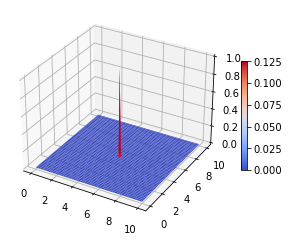

In [9]:
#%matplotlib notebook
fig=plt.figure(0)                       #blank figure
axes=fig.add_subplot(projection='3d')   #3d axis
surf=axes.plot_surface(x_mesh,y_mesh,sol[0],cmap='coolwarm') #3d plot
fig.colorbar(surf,shrink=0.5,aspect=20)  #for colour bar on RHS
plt.show()

In [10]:
sol=Jacobi_2D(sol,B,tol)

399 0.00042366778313866174


In [11]:
#sol_GS=Gauss_Seidal_2D(sol_GS,B)
#sol_RB_GS=Gauss_Seidal_2D(sol_GS,B)
#sol_SOR=SOR_2D(sol_SOR,B,omega)

NameError: name 'i_ter' is not defined

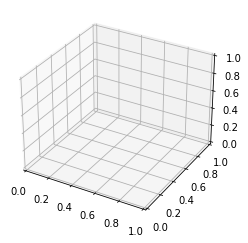

In [12]:
fig=plt.figure(1)                       
axes=fig.add_subplot(projection='3d')
surf1=axes.plot_surface(x_mesh,y_mesh,sol[i_ter],cmap='summer')
#surf2=axes.plot_surface(x_mesh,y_mesh,sol_GS[-1],cmap='autumn')
fig.colorbar(surf1,shrink=0.5,aspect=20)
#fig.colorbar(surf2,shrink=0.5,aspect=20)
#surf3=axes.plot_surface(x_mesh,y_mesh,sol_RB_GS[-1],cmap='coolwarm')
#fig.colorbar(surf3,shrink=0.5,aspect=20)
#surf4=axes.plot_surface(x_mesh,y_mesh,sol_SOR[-1],cmap='coolwarm')
#fig.colorbar(surf4,shrink=0.5,aspect=20)
plt.show()